# 感知机模型

1、感知机是根据输入特征实例x进行二分类的线性分类模型：
$$
f(x)=\operatorname{sign}(w\cdot x+b)
$$
其中，$\operatorname{sign}$是符号函数，即
$$
\operatorname{sign}(x)=
\begin{cases}
+1, x\ge 0\\
-2, x<0\\
\end{cases}
$$
w为分离超平面的法向量，b为分离超平面的截距

2、数据集的线性可分性：
给定数据集
$$
T=\{(x_{1},y_{1}),(x_{2},y_{2}),...,(x_{n},y_{n})\}
$$
如果存在某个超平面S
$$
w\cdot x+b=0
$$
使得$y_{i}(w\cdot x_{i}+b)>0$,则称数据集T为线性可分数据集

## 损失函数

函数间隔损失函数

任意一点$x_{0}$到超平面S的距离为
$$
\frac{1}{\Arrowvert w \Arrowvert}\bracevert w\cdot x_{0}+b\bracevert
$$
对于误分类的数据$(x_{i}, y_{i})$来说，
$$
-y_{i}（w\cdot x_{i）}+b>0
$$
因此，误分类点$x_{i}$到超平面的距离为
$$
-\frac{1}{\Arrowvert w \Arrowvert}y_{i}(w\cdot x_{i}+b)
$$
这样，对于误分类点集合M，所有误分类点到超平面的距离之和为
$$
-\frac{1}{\Arrowvert w \Arrowvert}\sum_{x_{i}\in M} y_{i}(w\cdot x_{i}+b)
$$
不考虑$\frac{1}{\Arrowvert w \Arrowvert}$，得到损失函数
$$
L(w,b)=-\sum_{x_{i}\in M} y_{i}(w\cdot x_{i}+b)
$$

Q.

为什么这里不考虑$\frac{1}{\Arrowvert w \Arrowvert}$?

A.

1.超平面由法向量w和截距b确定，w的大小并不影响w的方向，$\frac{1}{\Arrowvert w \Arrowvert}$的大小并不影响分类的结果（这里也可以看作将$\Arrowvert w \Arrowvert$视为1）。

2.对于线性可分数据集，最终的损失函数值为0，$\frac{1}{\Arrowvert w \Arrowvert}$并不影响分类的最总结果。

3.采用梯度下降等算法时，不考虑$\frac{1}{\Arrowvert w \Arrowvert}$可以减少运算量。

## 感知机学习方法

### 1、感知机的学习目标
感知机的学习目标为最小化损失函数，即
$$
\min_{w,b}L(w,b)=-\sum_{x_{i}\in M} y_{i}(w\cdot x_{i}+b)
$$
### 2、采用梯度下降法进行学习

#### 2.1、梯度下降法
由泰勒公式：
$$
f(x + \Delta x)=f(x)+\sum_{i=1}^{\infty}\frac{1}{i!}f^{(i)}(x)(\Delta x)^i
$$
可得$f(x + \Delta x) = f(x)+f'(x)\Delta x + O(\Delta x)$，当$\Delta x*f'(x)>0$ 且 $\Delta x$值较小时,$f(x + \Delta x) > f(x)$,由此可构建一个递增的序列达到极大值，同理可达到极小值。

将该结论推广至高维情况，
$$
f(x + \Delta x)=f(x) + [\nabla f(x)]^T\cdot \Delta x + O(\Delta x)
$$
在$\Delta x$取值较小时，可以忽略$O(\Delta x)$,得到
$$
f(x + \Delta x)-f(x)=[\nabla f(x)]^T\cdot \Delta x=\Arrowvert \nabla f(x)\Arrowvert \Arrowvert\Delta x\Arrowvert \operatorname{cos}\theta
$$
其中$\operatorname{cos}\theta$为 $\nabla f(x)$和$\Delta x$夹角的余弦，当 $\theta = \pi$即增量方向与梯度方向相反时，下降速度最快。

P.S.在讨论时，我们要求$\Delta x$的值较小，在实现时一般添加一个较小的常数来进行限制称之为学习率。

P.S.S在这里我们只对损失函数进行一阶泰勒展开，高阶泰勒展开也是理论上可行的。


##### 2.1.1批梯度下降（BGD）

在计算梯度时，通过整个训练集的数据计算梯度。

优点是下降速度快；缺点是计算时间长，且不能在投入新数据时实时更新梯度。


##### 2.1.2随机梯度下降（SGD）

计算梯度时，只根据一个样本数据进行梯度计算。

优点是计算时间短且可以根据新数据实时更新梯度；缺点是噪音比较多，损失函数可能出现震荡。


##### 2.2.3小批量梯度下降（MBGD）

在计算梯度时，选取少量样本数据计算梯度。

优点可以降低更新时的方差，收敛更稳定；缺点是不能保证很好的收敛性，学习率如果选择的太小，收敛速度会很慢，如果太大，损失函数就会在极小值处不停地震荡甚至偏离。


P.S.考虑鞍点的情况，BGD会停留在鞍点，MBGD，SGD每次计算的方向会不同，陷入震荡。

P.S.S. 稀疏特征对应的参数在更新时的梯度会非常小几乎消失，所以在很多轮次后才可能得到稍微明显的更新，而稠密特征的参数则每次都会得到相对明显的更新。我们希望对于不同稠密度的特征对应的参数更新采取不同的学习率。对于稀疏的，我们希望调大他的学习率，让“难得”的一次更新步子更大，效果更加明显；对于稠密的，更新太过频繁，我们希望降低它的学习率，让每次的步子稍微小一点，不至于跳出全局最优点。

#### 2.2感知机学习算法原始形式

输入：训练集$T=\{(x_1, y_1),(x_2, y_2),(x_3, y_3),\cdots,(x_n, y_n)\}$， 学习率$\eta$

输出： w, b

(1)选取初值$w_0, b_0$

(2)在训练集选取数据$0（x_i, y_i）$

(3)若$y_{i}（w\cdot x_{i）}+b \le 0$
$$
w \gets w+\eta y_ix_i \\
b \gets b+\eta y_i
$$

(4)转至(2)直至训练集中没有误分类点

### 3、学习收敛性的证明

设训练数据集$T=\{(x_1, y_1),(x_2, y_2),(x_3, y_3),\cdots,(x_n, y_n)\}$是线性可分的，
(1)存在满足条件的 $\Arrowvert w_{opt}\Arrowvert =1$d的超平面$w_{opt}\cdot x+b_{opt}=0$将数据集完全正确分开且存在$\gamma >0$使得对所有$i=1,2,\cdots,n$ 
$$
y_i(w_{opt}\cdot x_i+b_{opt})\ge \gamma
$$
(2)令$R=\operatorname{max}_{1 \le i \le n} \Arrowvert x_i \Arrowvert$,则算法2.2的误分类次数k满足
$$
k \le \left( \frac{R}{\gamma} \right)^2
$$
证明：

(1)已知训练集线性可分，则存在w,b确定的超平面将训练集正确分开，令$w_{opt}=\frac{w}{\Arrowvert w \Arrowvert}  \qquad b_{opt}=\frac{b}{\Arrowvert w \Arrowvert}$

已知对$i=0,1,\cdots,n$,
$$
y_i(w_{opt}\cdot x_i+b_{opt})> 0 
$$
所以存在
$$
\gamma =\min_i\{ y_i(w_{opt}\cdot x_i+b_{opt})\}
$$

(2)令$\hat{w}_k=(w^T_{k},b_{k})^T \qquad \hat{x}=(x^T,1)^T$
对于第k个误分类点$(x_i, y_i)$,有
$$
w_k \gets w_{k-1}+\eta y_ix_i \\
b_k \gets w_{k-1}+\eta y_i
$$
即
$$
\hat{w_k} = \hat{w_{k-1}}+\eta y_i\hat{x_i}
$$
由此，两边同乘$\hat{w_{opt}}$得
$$
\hat{w_k}\cdot\hat{w_{opt}}=\hat{w_{k-1}}\cdot\hat{w_{opt}}+\eta y_i\hat{w_{opt}}\cdot\hat{x_i}\\
\ge\hat{w_{k-1}}\cdot\hat{w_{opt}}+\eta\gamma
$$
递推得到
$$
\hat{w_k}\cdot\hat{w_{opt}}\ge k\eta\gamma
$$
同时，可得到
$$
\Arrowvert\hat{w_k}\Arrowvert^2 = \Arrowvert\hat{w_{k-1}}\Arrowvert^2 
+2\eta y_i\hat{w_{k-1}}\cdot\hat{x_i}+\eta^2\Arrowvert\hat{x_i}\Arrowvert^2 \\
\le\Arrowvert\hat{w_{k-1}}\Arrowvert^2 +\eta^2\Arrowvert\hat{x_i}\Arrowvert^2 \\
\le\Arrowvert\hat{w_{k-1}}\Arrowvert^2 +\eta^2R^2
\le k\eta^2R^2
$$
综上，可得
$$
k\eta\gamma\le\hat{w_k}\cdot\hat{w_{opt}}\le\Arrowvert\hat{w_k}\Arrowvert\Arrowvert\hat{w_{opt}}\Arrowvert\le\sqrt{k}\eta R\\
k^2\gamma^2\le kR^2
$$
即
$$
k \le \left( \frac{R}{\gamma} \right)^2
$$
### 4、感知机的对偶形式
#### 4.1对偶形式
对偶形式的基本想法是，将 w 和 b 表示为是咧 xi 和标记 yi的线性组合的形式，通过求解其系数而得到 w 和 b。 
#### 4.2感知机的对偶形式
由算法可知，对误分类的点$(x_i, y_i)$,通过
$$
w\gets w+\eta y_ix_i\\
b\gets b+\eta y_i
$$
若修改n次，则最后学习到的w,b可以表示为
$$
w=\sum_{i=1}^N\alpha_iy_ix_i\\
b=\sum_{i=1}^N\alpha_iy_i
$$
这里$\alpha_i=k_i*\eta$,其中$k_i$为第i个实例由于误分而进行的更新次数

最后得到的模型为
$$
f(x)=\operatorname{sign}\left(\sum_{i=1}^N\alpha_iy_ix_i\cdot x+\sum_{i=1}^N\alpha_iy_i\right)
$$
相应地，对应的算法为：
(1)$\alpha\gets 0,\quad b\gets 0$

(2)在训练集选取数据$x_i, y_i$
(3)若$y_i\left(\sum_{i=1}^N\alpha_iy_ix_i\cdot x+\sum_{i=1}^N\alpha_iy_i\right)\le 0$
$$
\alpha_i\gets\alpha_i+\eta
\
$$
(4)转至(2)直至没有误分类数据
### 4.3对偶形式的实际意义
由上可见对偶形式与一般形式的算法本质没有区别，但如果预先将训练集中实例间的内积计算出来并以矩阵的形式存储下来，即Gram矩阵就可以减少训练时间
$$
G=[x_i\cdot x_j]_{N\times N}
$$


## 相关代码实现

In [59]:
#经典感知机
import numpy as np
class Perceptron:
    def __init__(self, lr=0.01):
        self.lr=lr
    def fit(self, X, y):
        self.w=np.random.randn(X.shape[1])
        self.b=0 
        is_wrong=True
        while  is_wrong:
            wrong_count=0
            for X_,y_ in zip(X,y):
                if y_*(self.sign(X_,self.w,self.b))<=0:
                    self.w=self.w+self.lr*np.dot(y_, X_)
                    self.b=self.b+self.lr*y_
                    wrong_count +=1
            is_wrong = (wrong_count>0)     
    def sign(self,X,w,b):
        return np.dot(X, w)+b
    
    def predict(self,X):
        return np.where((np.dot(X, self.w)+self.b)>=0.0, 1, -1)

#对偶形式感知机
class DualityPerceptron:
    def __init__(self, lr=0.01):
        self.lr=lr
    def fit(self, X, y):
        self.alpha=np.random.randn(X.shape[0])
        self.b=0
        G=np.dot(X, X.T)
        is_wrong=True
        while is_wrong:
            wrong_count=0
            for idx in range(X.shape[0]):
                if y[idx]*(np.sum(self.alpha*y*G[idx])+self.b)<=0:
                    self.alpha+=self.lr
                    self.b+=self.lr*y[idx]
                    wrong_count +=1
            is_wrong = (wrong_count>0) 
        self.w=np.sum(self.alpha*y*X.T, axis=1)
    
    def predict(self, X):
        return np.where((np.dot(X, self.w)+self.b)>=0.0, 1, -1)
        
    

In [41]:
import pandas as pd
df = pd.read_csv('http://archive.ics.uci.edu/ml/'
                'machine-learning-databases/iris/iris.data',
                header = None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


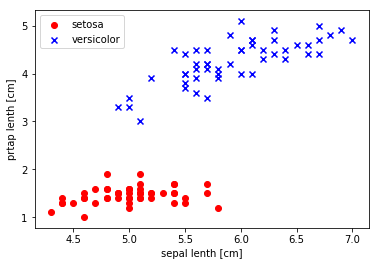

In [42]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0: 100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0,2]].values

plt.scatter(X[:50, 0], X[:50, 1],
            color = 'red', marker = 'o', 
            label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], 
            color = 'blue', marker = 'x',
            label = 'versicolor')

plt.xlabel('sepal lenth [cm]')
plt.ylabel('prtap lenth [cm]')
plt.legend(loc = 'upper left')
plt.show()

In [43]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution = 0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


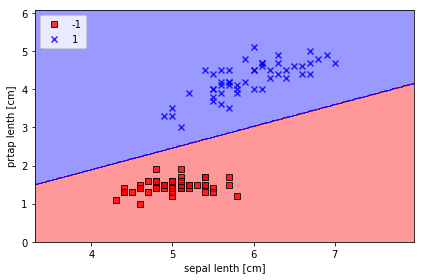

In [44]:
ppn = Perceptron()
ppn.fit(X,y)
plot_decision_regions(X, y, classifier = ppn)
plt.xlabel('sepal lenth [cm]')
plt.ylabel('prtap lenth [cm]')
plt.legend(loc = 'upper left')

plt.tight_layout()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


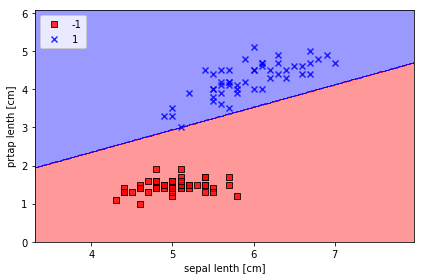

In [60]:
dppn = DualityPerceptron()
dppn.fit(X,y)
plot_decision_regions(X, y, classifier = dppn)
plt.xlabel('sepal lenth [cm]')
plt.ylabel('prtap lenth [cm]')
plt.legend(loc = 'upper left')

plt.tight_layout()
plt.show()

In [ ]:
%timeit ppn.fit(X,y)

In [ ]:
%timeit dppn.fit(X,y)

In [ ]:

%timeit ppn.fit(X,y)
%timeit dppn.fit(X,y)